In [1]:
# %% 
# Importings...
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

tf.random.set_seed(1)


In [2]:
# %% 
# Load data
his_power_fd_df = pd.read_csv('.\\data\\FD001\\02_His_Power_FD.csv')
his_power_fd_df.head(10)


,Datetime,Power(MW)
0,2022/7/15 0:00:00,0.0216
1,2022/7/15 0:15:00,0.0218
2,2022/7/15 0:30:00,0.4021
3,2022/7/15 0:45:00,0.5867
4,2022/7/15 1:00:00,0.3889
5,2022/7/15 1:15:00,0.1336
6,2022/7/15 1:30:00,0.2963
7,2022/7/15 1:45:00,0.6714
8,2022/7/15 2:00:00,1.1557
9,2022/7/15 2:15:00,1.1521


In [3]:
his_nmp_fd_df = pd.read_csv('.\\data\\FD001\\03 His_NWP_FD.csv')
his_nmp_fd_df.head(10)

,Datetime,Speed10,Direction10,Speed30,Direction30,Speed50,Direction50,Speed70,Direction70,Speed90,Direction90,Speed100,Direction100,Temper,Pressure,Humidity
0,2022/7/15 0:00:00,3.3696,290.3172,4.1829,295.0334,4.9253,297.9698,5.6139,300.0360,6.2446,301.5774,6.5423,302.1353,27.59,1003.96,93.20
1,2022/7/15 0:15:00,3.3092,291.4477,4.1100,296.1286,4.8389,299.0546,5.5137,301.1241,6.1388,302.6287,6.4347,303.2702,27.61,1004.37,93.05
2,2022/7/15 0:30:00,3.4671,295.0868,4.2669,299.3285,5.0000,302.0054,5.6718,303.8582,6.2926,305.2307,6.5832,305.7906,27.62,1004.25,92.96
3,2022/7/15 0:45:00,3.6896,296.9123,4.4933,300.7888,5.2253,303.4468,5.9067,305.1430,6.5341,306.5367,6.8241,307.1386,27.62,1003.96,92.82
4,2022/7/15 1:00:00,3.7095,298.4995,4.5220,302.3546,5.2791,304.8942,5.9740,306.6973,6.6113,307.9966,6.9170,308.5434,27.64,1003.68,92.59
5,2022/7/15 1:15:00,3.5143,302.9213,4.3541,306.5014,5.1350,308.8341,5.8376,310.4842,6.4950,311.6921,6.8108,312.1435,27.67,1003.46,92.28
6,2022/7/15 1:30:00,3.3300,306.6978,4.1933,310.2604,4.9758,312.4751,5.7001,314.0049,6.3640,315.1273,6.6825,315.5457,27.70,1003.34,91.95
7,2022/7/15 1:45:00,3.0254,311.3819,3.9033,314.7924,4.7046,316.8087,5.4395,318.2790,6.1261,319.2364,6.4418,319.6592,27.74,1003.29,91.66
8,2022/7/15 2:00:00,3.7342,313.9150,4.4407,315.3649,5.0855,316.3544,5.6676,317.0735,6.2148,317.6085,6.4637,317.8217,26.83,1003.21,0.00
9,2022/7/15 2:15:00,3.1972,313.4792,4.0589,315.3993,4.8314,316.5935,5.5416,317.4133,6.1961,318.0746,6.5025,318.3665,27.53,1002.76,0.00


In [4]:
# 合并文件
fd_df=pd.merge(his_nmp_fd_df, his_power_fd_df, on=['Datetime'], how='left')
fd_df.head(10)

,Datetime,Speed10,Direction10,Speed30,Direction30,Speed50,Direction50,Speed70,Direction70,Speed90,Direction90,Speed100,Direction100,Temper,Pressure,Humidity,Power(MW)
0,2022/7/15 0:00:00,3.3696,290.3172,4.1829,295.0334,4.9253,297.9698,5.6139,300.0360,6.2446,301.5774,6.5423,302.1353,27.59,1003.96,93.20,0.0216
1,2022/7/15 0:15:00,3.3092,291.4477,4.1100,296.1286,4.8389,299.0546,5.5137,301.1241,6.1388,302.6287,6.4347,303.2702,27.61,1004.37,93.05,0.0218
2,2022/7/15 0:30:00,3.4671,295.0868,4.2669,299.3285,5.0000,302.0054,5.6718,303.8582,6.2926,305.2307,6.5832,305.7906,27.62,1004.25,92.96,0.4021
3,2022/7/15 0:45:00,3.6896,296.9123,4.4933,300.7888,5.2253,303.4468,5.9067,305.1430,6.5341,306.5367,6.8241,307.1386,27.62,1003.96,92.82,0.5867
4,2022/7/15 1:00:00,3.7095,298.4995,4.5220,302.3546,5.2791,304.8942,5.9740,306.6973,6.6113,307.9966,6.9170,308.5434,27.64,1003.68,92.59,0.3889
5,2022/7/15 1:15:00,3.5143,302.9213,4.3541,306.5014,5.1350,308.8341,5.8376,310.4842,6.4950,311.6921,6.8108,312.1435,27.67,1003.46,92.28,0.1336
6,2022/7/15 1:30:00,3.3300,306.6978,4.1933,310.2604,4.9758,312.4751,5.7001,314.0049,6.3640,315.1273,6.6825,315.5457,27.70,1003.34,91.95,0.2963
7,2022/7/15 1:45:00,3.0254,311.3819,3.9033,314.7924,4.7046,316.8087,5.4395,318.2790,6.1261,319.2364,6.4418,319.6592,27.74,1003.29,91.66,0.6714
8,2022/7/15 2:00:00,3.7342,313.9150,4.4407,315.3649,5.0855,316.3544,5.6676,317.0735,6.2148,317.6085,6.4637,317.8217,26.83,1003.21,0.00,1.1557
9,2022/7/15 2:15:00,3.1972,313.4792,4.0589,315.3993,4.8314,316.5935,5.5416,317.4133,6.1961,318.0746,6.5025,318.3665,27.53,1002.76,0.00,1.1521


In [5]:
fd_df.describe()

,Speed10,Direction10,Speed30,Direction30,Speed50,Direction50,Speed70,Direction70,Speed90,Direction90,Speed100,Direction100,Temper,Pressure,Humidity,Power(MW)
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,3.712421,223.926814,4.233122,222.229419,4.701244,218.922899,5.060789,219.404941,5.383788,219.130152,5.537242,217.072215,28.737143,1003.606607,58.546429,3.710794
std,1.602134,125.927252,1.792286,129.786391,1.988854,132.941549,2.061636,134.193927,2.126308,135.181068,2.159798,136.099331,1.301262,2.377774,41.399879,3.638163
min,0.540100,1.199700,0.490400,0.212200,0.411800,0.000000,0.813900,0.196900,0.863800,0.243800,0.898200,0.000000,25.980000,999.070000,0.000000,0.011400
25%,2.331450,62.434675,2.681150,58.140175,3.002925,54.946750,3.293625,53.203400,3.538725,51.951200,3.673775,50.321350,27.620000,1001.907500,0.000000,0.655450
50%,3.548950,296.837700,4.031700,299.033550,4.465850,300.276050,4.926550,301.582200,5.317150,302.442250,5.508950,302.320400,28.590000,1003.165000,80.340000,2.428400
75%,4.835750,313.453400,5.648275,314.043075,6.198675,314.921200,6.732225,316.457950,7.129950,317.304775,7.275200,317.133050,29.910000,1004.670000,91.927500,6.543700
max,10.449900,359.149100,11.169100,359.729700,11.825700,358.931200,12.435400,359.756200,13.002000,359.745900,13.266700,359.649200,31.270000,1010.140000,101.310000,14.473900


In [6]:
fd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 0 to 671
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      672 non-null    object 
 1   Speed10       672 non-null    float64
 2   Direction10   672 non-null    float64
 3   Speed30       672 non-null    float64
 4   Direction30   672 non-null    float64
 5   Speed50       672 non-null    float64
 6   Direction50   672 non-null    float64
 7   Speed70       672 non-null    float64
 8   Direction70   672 non-null    float64
 9   Speed90       672 non-null    float64
 10  Direction90   672 non-null    float64
 11  Speed100      672 non-null    float64
 12  Direction100  672 non-null    float64
 13  Temper        672 non-null    float64
 14  Pressure      672 non-null    float64
 15  Humidity      672 non-null    float64
 16  Power(MW)     672 non-null    float64
dtypes: float64(16), object(1)
memory usage: 94.5+ KB


In [7]:
fd_df.drop('Datetime', axis=1, inplace=True)

In [8]:
# # Normalization
scaler = MinMaxScaler()
scaler = scaler.fit(fd_df)
fd_df=scaler.transform(fd_df)

In [9]:
fd_df_train = fd_df[:int(0.6*len(fd_df))]
fd_df_valid = fd_df[:int(0.6*len(fd_df)):int(0.8*len(fd_df))]
fd_df_test =fd_df[int(0.8*len(fd_df)):]

In [10]:
# %% 
# Split X and y
def split_x_and_y(array, days_used_to_train=7):
    features = list()
    labels = list()

    for i in range(days_used_to_train, len(array)):
        features.append(array[i-days_used_to_train:i, :])
        labels.append(array[i, -1])
    return np.array(features), np.array(labels)

In [11]:
train_X, train_y = split_x_and_y(fd_df_train)
valid_X, valid_y = split_x_and_y(fd_df_valid)
test_X, test_y = split_x_and_y(fd_df_test)

print('Shape of Train X: {} \n Shape of Train y: {}'.format(train_X.shape, train_y.shape))
print(train_X[:5, -1, -1])
print(train_y[:5])

Shape of Train X: (396, 7, 16) 
 Shape of Train y: (396,)
[0.01969922 0.04563526 0.07912187 0.07887295 0.0274503 ]
[0.04563526 0.07912187 0.07887295 0.0274503  0.06287986]


In [12]:
# %%
# Model establishing and compiling
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64))
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(1))

model.compile(
    optimizer='adam',
    loss='mse'
)

In [13]:
# %%
# Fitting
model.fit(
    train_X, train_y,
    validation_data=(valid_X, valid_y),
    batch_size=32,
    epochs=100
)

Epoch 1/100
13/13 [==============================] - 1s 6ms/step - loss: 0.0999
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0293
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0186
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0127
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0111
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0110
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0098
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0099
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0097
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0095
Epoch 11/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0090
Epoch 12/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0092
Epoch 13/100
13/13 [=================

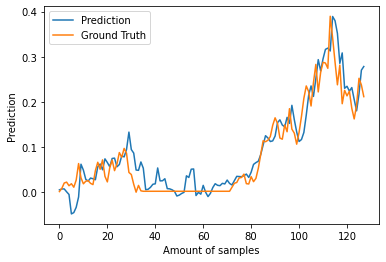

In [14]:
# %%
# Predicting
pred_y = model.predict(test_X)
# %% Plotting
# plt.plot(range(len(train_y)), train_y, label='train_y')
plt.plot(range(len(pred_y)), pred_y, label='Prediction')
plt.plot(range(len(pred_y)), test_y, label='Ground Truth')
plt.xlabel('Amount of samples')
plt.ylabel('Prediction')
plt.legend()
plt.show()
# %%

In [15]:
# 导入未来数据feature_df
feature_nwp_df=pd.read_csv(('.\\data\\FD001\\04 Fore_NWP_FD.csv'))
feature_nwp_df

,Datetime,Speed10,Direction10,Speed30,Direction30,Speed50,Direction50,Speed70,Direction70,Speed90,Direction90,Speed100,Direction100,Temper,Pressure,Humidity
0,2022-07-22 \t00:00:00,3.7211,295.8076,5.0066,304.4201,6.2332,309.2053,7.0688,311.6739,7.2327,312.6467,7.3154,313.1167,27.48,1009.94,91.75
1,2022-07-22 \t00:15:00,3.8066,293.5346,5.0170,301.8843,6.1681,306.6284,7.2085,309.6529,7.3615,310.5929,7.4355,311.0192,27.50,1010.59,91.66
2,2022-07-22 \t00:30:00,3.6731,294.9604,4.9233,302.9800,6.1044,307.5457,7.1653,310.3584,7.3207,311.1786,7.4027,311.5500,27.49,1010.61,91.58
3,2022-07-22 \t00:45:00,3.5422,297.2161,4.8605,305.0306,6.0974,309.2762,7.0755,311.7344,7.2339,312.4229,7.3028,312.7803,27.49,1010.30,91.49
4,2022-07-22 \t01:00:00,3.3743,298.6918,4.7401,306.5073,6.0209,310.6219,6.9490,312.7840,7.1021,313.4025,7.1718,313.7571,27.49,1010.12,91.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,2022-07-28 \t22:45:00,3.2940,53.2693,3.4840,49.7733,3.6509,46.9979,3.8255,44.6823,3.9843,42.6606,4.0584,41.7039,28.85,1004.59,85.20
668,2022-07-28 \t23:00:00,3.1397,55.9050,3.3223,52.3368,3.5110,49.5049,3.6723,47.0966,3.8396,45.1055,3.9178,44.1727,28.87,1004.80,85.14
669,2022-07-28 \t23:15:00,3.0180,57.3104,3.2122,53.7366,3.4047,50.8408,3.5776,48.5128,3.7421,46.6242,3.8258,45.7413,28.88,1004.96,85.25
670,2022-07-28 \t23:30:00,3.0518,57.7160,3.2549,54.5032,3.4469,51.8334,3.6325,49.6895,3.8094,47.9792,3.8917,47.0826,28.88,1005.16,85.60


In [16]:
# 为使用函数对feature_df增加一空列power
fea_power_fd_df=pd.read_csv(('.\\data\\YC_Result_FD.csv'))
feature_df=pd.merge(feature_nwp_df, fea_power_fd_df, on=['Datetime'], how='left')
feature_df

,Datetime,Speed10,Direction10,Speed30,Direction30,Speed50,Direction50,Speed70,Direction70,Speed90,Direction90,Speed100,Direction100,Temper,Pressure,Humidity,Power(MW)
0,2022-07-22 \t00:00:00,3.7211,295.8076,5.0066,304.4201,6.2332,309.2053,7.0688,311.6739,7.2327,312.6467,7.3154,313.1167,27.48,1009.94,91.75,1
1,2022-07-22 \t00:15:00,3.8066,293.5346,5.0170,301.8843,6.1681,306.6284,7.2085,309.6529,7.3615,310.5929,7.4355,311.0192,27.50,1010.59,91.66,1
2,2022-07-22 \t00:30:00,3.6731,294.9604,4.9233,302.9800,6.1044,307.5457,7.1653,310.3584,7.3207,311.1786,7.4027,311.5500,27.49,1010.61,91.58,1
3,2022-07-22 \t00:45:00,3.5422,297.2161,4.8605,305.0306,6.0974,309.2762,7.0755,311.7344,7.2339,312.4229,7.3028,312.7803,27.49,1010.30,91.49,1
4,2022-07-22 \t01:00:00,3.3743,298.6918,4.7401,306.5073,6.0209,310.6219,6.9490,312.7840,7.1021,313.4025,7.1718,313.7571,27.49,1010.12,91.35,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,2022-07-28 \t22:45:00,3.2940,53.2693,3.4840,49.7733,3.6509,46.9979,3.8255,44.6823,3.9843,42.6606,4.0584,41.7039,28.85,1004.59,85.20,1
668,2022-07-28 \t23:00:00,3.1397,55.9050,3.3223,52.3368,3.5110,49.5049,3.6723,47.0966,3.8396,45.1055,3.9178,44.1727,28.87,1004.80,85.14,1
669,2022-07-28 \t23:15:00,3.0180,57.3104,3.2122,53.7366,3.4047,50.8408,3.5776,48.5128,3.7421,46.6242,3.8258,45.7413,28.88,1004.96,85.25,1
670,2022-07-28 \t23:30:00,3.0518,57.7160,3.2549,54.5032,3.4469,51.8334,3.6325,49.6895,3.8094,47.9792,3.8917,47.0826,28.88,1005.16,85.60,1


In [17]:
# 去除无关项
feature_df.drop('Datetime', axis=1, inplace=True)
feature_df 

,Speed10,Direction10,Speed30,Direction30,Speed50,Direction50,Speed70,Direction70,Speed90,Direction90,Speed100,Direction100,Temper,Pressure,Humidity,Power(MW)
0,3.7211,295.8076,5.0066,304.4201,6.2332,309.2053,7.0688,311.6739,7.2327,312.6467,7.3154,313.1167,27.48,1009.94,91.75,1
1,3.8066,293.5346,5.0170,301.8843,6.1681,306.6284,7.2085,309.6529,7.3615,310.5929,7.4355,311.0192,27.50,1010.59,91.66,1
2,3.6731,294.9604,4.9233,302.9800,6.1044,307.5457,7.1653,310.3584,7.3207,311.1786,7.4027,311.5500,27.49,1010.61,91.58,1
3,3.5422,297.2161,4.8605,305.0306,6.0974,309.2762,7.0755,311.7344,7.2339,312.4229,7.3028,312.7803,27.49,1010.30,91.49,1
4,3.3743,298.6918,4.7401,306.5073,6.0209,310.6219,6.9490,312.7840,7.1021,313.4025,7.1718,313.7571,27.49,1010.12,91.35,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,3.2940,53.2693,3.4840,49.7733,3.6509,46.9979,3.8255,44.6823,3.9843,42.6606,4.0584,41.7039,28.85,1004.59,85.20,1
668,3.1397,55.9050,3.3223,52.3368,3.5110,49.5049,3.6723,47.0966,3.8396,45.1055,3.9178,44.1727,28.87,1004.80,85.14,1
669,3.0180,57.3104,3.2122,53.7366,3.4047,50.8408,3.5776,48.5128,3.7421,46.6242,3.8258,45.7413,28.88,1004.96,85.25,1
670,3.0518,57.7160,3.2549,54.5032,3.4469,51.8334,3.6325,49.6895,3.8094,47.9792,3.8917,47.0826,28.88,1005.16,85.60,1


In [18]:
# 对feature_df进行归一化fd_df=scaler.transform(fd_df)
feature_df=scaler.transform(feature_df)
feature_df

array([[0.32099538, 0.82304342, 0.42291665, ..., 0.98193315, 0.90563617,
        0.06835609],
       [0.3296232 , 0.81669337, 0.42389055, ..., 1.04065041, 0.9047478 ,
        0.06835609],
       [0.31615169, 0.82067661, 0.41511607, ..., 1.04245709, 0.90395815,
        0.06835609],
       ...,
       [0.25004541, 0.15675595, 0.25488121, ..., 0.53206865, 0.84147666,
        0.06835609],
       [0.25345617, 0.15788908, 0.25887983, ..., 0.5501355 , 0.8449314 ,
        0.06835609],
       [0.26459666, 0.15662856, 0.27140008, ..., 0.5736224 , 0.84621459,
        0.06835609]])

In [19]:
feature_x, feature_y = split_x_and_y(feature_df)

In [20]:
predict_y=model.predict(feature_x)

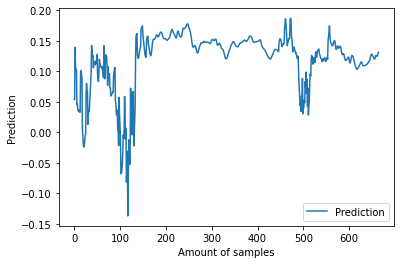

In [21]:
# %% Plotting
plt.plot(range(len(predict_y)), predict_y, label='Prediction')
plt.xlabel('Amount of samples')
plt.ylabel('Prediction')
plt.legend()
plt.show()
# %%